Pillowで読みだせばtransformsは通る

が、ロードでコケる。
おそらくImage.openで開くと、ファイルを開きっぱなしになることが原因

メモリ効率の点でもopen-cvで開いてテンソル化した状態でデータを保持したい

In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from pathlib import Path

import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms

from models.AlexNet.data_loader import ILSVRC
from utils.transforms import ImageTransfrom

In [5]:
DEFAULT_ILSVRC_DIR = Path('D:/workspace/ObjectDetection/dataset/ILSVRC')
data_dir = DEFAULT_ILSVRC_DIR

In [34]:
train_dataset = ILSVRC(data_dir=data_dir, mode='train', pre_download_image=True)

train loader


Getting annotations:   0%|          | 0/544546 [00:00<?, ?it/s]

Getting images:   0%|          | 0/544546 [00:00<?, ?it/s]

In [35]:
train_dataset[0]

TypeError: Unexpected type <class 'numpy.ndarray'>

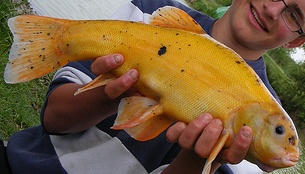

In [65]:
image = cv2.cvtColor(cv2.imread('./dataset/ILSVRC/train/00000000.jpg'), cv2.COLOR_BGR2RGB)
# image_ = Image.open('./dataset/ILSVRC/train/00000000.jpg')
Image.fromarray(image)
# np.array(image)

In [66]:
IMAGE_SIZE = (224, 224)
IMAGE_NET_MEAN = (0.485, 0.456, 0.406)
IMAGE_NET_STD = (0.229, 0.224, 0.225)

random_resize_crop = transforms.RandomResizedCrop(size=IMAGE_SIZE, scale=(0.8, 1))
random_horizontal_flip = transforms.RandomHorizontalFlip()
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=IMAGE_NET_MEAN, std=IMAGE_NET_STD)

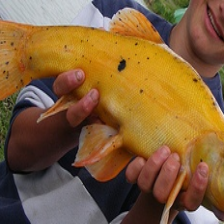

In [77]:
# Image.fromarray
Image.fromarray(np.array(random_resize_crop(torch.tensor(image.transpose(2, 0, 1), dtype=torch.float32)), dtype=np.uint8).transpose(1, 2, 0))

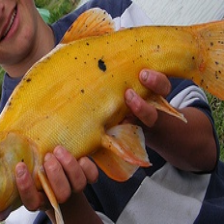

In [78]:
Image.fromarray(np.array(random_horizontal_flip(random_resize_crop(torch.tensor(image.transpose(2, 0, 1), dtype=torch.float32))), dtype=np.uint8).transpose(1, 2, 0))

In [79]:
normalize(random_horizontal_flip(random_resize_crop(torch.tensor(image.transpose(2, 0, 1), dtype=torch.float32))))

tensor([[[765.1310, 822.8457, 817.8239,  ..., 598.4642, 644.5341, 669.2792],
         [737.8267, 776.3703, 803.3003,  ..., 606.3070, 623.7170, 640.5226],
         [728.8114, 737.8585, 786.6616,  ..., 621.5128, 640.9016, 643.9968],
         ...,
         [ 72.3362,  76.6455,  77.9052,  ..., 511.0921, 412.4846, 393.5135],
         [ 73.7253,  76.3629,  74.5131,  ..., 673.7025, 606.6918, 578.7429],
         [ 76.4847,  76.1208,  71.6084,  ..., 590.5309, 608.1440, 741.9855]],

        [[804.6607, 863.2916, 854.0654,  ..., 401.6099, 441.0445, 452.8749],
         [782.6860, 821.9655, 848.1264,  ..., 404.3817, 411.1016, 420.2099],
         [784.3512, 793.2714, 839.5465,  ..., 407.6511, 414.4449, 414.1264],
         ...,
         [ 87.9915,  92.3970,  93.6847,  ..., 485.8358, 368.3053, 337.6365],
         [ 93.3575,  96.0540,  94.1630,  ..., 694.0695, 601.6845, 566.7630],
         [ 96.1786,  95.8065,  91.1935,  ..., 627.2050, 623.7084, 754.4362]],

        [[827.9733, 887.4548, 890.4918,  ...

In [32]:
normalize(to_tensor(random_horizontal_flip(random_resize_crop(image))))

tensor([[[ 0.5193,  0.4166,  0.2453,  ...,  1.1015,  1.1187,  0.8961],
         [ 0.3994,  0.3309,  0.2624,  ...,  1.0502,  0.9303,  0.7762],
         [ 0.4166,  0.3994,  0.3309,  ...,  0.9817,  0.7762,  0.7419],
         ...,
         [-0.5596, -0.4911, -0.1143,  ..., -1.8097, -1.8097, -1.8268],
         [ 0.1597,  0.2624,  0.5364,  ..., -1.8097, -1.8097, -1.8268],
         [ 0.7933,  0.2796,  0.2111,  ..., -1.8268, -1.8097, -1.8097]],

        [[-0.2500, -0.3025, -0.4601,  ...,  1.3256,  1.3606,  1.1331],
         [-0.3725, -0.4251, -0.4426,  ...,  1.3081,  1.2031,  1.0455],
         [-0.4076, -0.4076, -0.4426,  ...,  1.2731,  1.0805,  1.0455],
         ...,
         [-0.7052, -0.5826, -0.1275,  ..., -1.6506, -1.6681, -1.6856],
         [ 0.1877,  0.3277,  0.6954,  ..., -1.6506, -1.6506, -1.6681],
         [ 0.9230,  0.4153,  0.4328,  ..., -1.6681, -1.6506, -1.6506]],

        [[-0.2707, -0.3404, -0.4973,  ...,  1.6988,  1.6814,  1.4548],
         [-0.3927, -0.4450, -0.4798,  ...,  1

In [24]:
random_resize_crop(torch.tensor(image))

tensor([[[ 89,  89,  89,  ...,  49,  49,  49],
         [ 89,  89,  89,  ...,  49,  49,  49],
         [ 89,  89,  89,  ...,  49,  49,  49],
         ...,
         [ 95,  95,  95,  ...,  57,  57,  57],
         [ 95,  95,  95,  ...,  57,  57,  57],
         [ 95,  95,  95,  ...,  57,  57,  57]],

        [[ 85,  85,  85,  ...,  48,  48,  48],
         [ 85,  85,  85,  ...,  48,  48,  48],
         [ 85,  85,  85,  ...,  48,  48,  48],
         ...,
         [ 97,  97,  97,  ...,  61,  61,  61],
         [ 97,  97,  97,  ...,  61,  61,  61],
         [ 97,  97,  97,  ...,  61,  61,  61]],

        [[ 82,  82,  82,  ...,  48,  48,  48],
         [ 82,  82,  82,  ...,  48,  48,  48],
         [ 82,  82,  82,  ...,  48,  48,  48],
         ...,
         [ 81,  81,  81,  ...,  45,  45,  45],
         [ 81,  81,  81,  ...,  45,  45,  45],
         [ 81,  81,  81,  ...,  45,  45,  45]],

        ...,

        [[ 11,  11,  11,  ...,   5,   5,   5],
         [ 11,  11,  11,  ...,   5,   5,   5]

In [85]:
import time

from PIL import Image
from tqdm import tqdm

In [107]:
data_dir = Path('D:/workspace/ObjectDetection/dataset/ILSVRC')
data_dir = 'D:/workspace/ObjectDetection/dataset/ILSVRC/train/'

In [95]:
start = time.time()
index = 212345
for _ in tqdm(range(10000000)):
    index = str(index).zfill(8)
    image_path = data_dir + index + '.jpg'
    annotation_path = data_dir + index + '.json'
finish = time.time()
result = finish - start

100%|██████████| 10000000/10000000 [00:02<00:00, 4483466.52it/s]


In [96]:
result_ = 49.236029863357544

In [93]:
result_, result

(49.6773521900177, 49.236029863357544)

In [111]:
data_transform = transforms.Compose(
    [
        transforms.RandomResizedCrop(size=224, scale=(0.8, 1)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        # transforms.Normalize(mean=mean, std=std)
    ]
)

In [110]:
start = time.time()
index = 12345
for _ in tqdm(range(100000)):
    index = str(index).zfill(8)
    image_path = data_dir + index + '.jpg'
    image = torch.tensor(cv2.imread(image_path).transpose(2, 0, 1), dtype=torch.float32)
    data_transform(image)
finish = time.time()
result = finish - start
result

100%|██████████| 100000/100000 [01:35<00:00, 1052.47it/s]


95.01566123962402

In [112]:
start = time.time()
index = 12345
for _ in tqdm(range(100000)):
    index = str(index).zfill(8)
    image_path = data_dir + index + '.jpg'
    image = Image.open(image_path)
    data_transform(image)
finish = time.time()
result_ = finish - start
result_

100%|██████████| 100000/100000 [01:50<00:00, 907.16it/s]


110.23568916320801

In [101]:
image_path

'D:/workspace/ObjectDetection/dataset/ILSVRC/00212345.jpg'